<a href="https://colab.research.google.com/github/pdivya-mca/Task-5---Predict-Future-Adoption/blob/main/Future_User_Adoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predict Future User Adoption**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read csv file
#import 'takehome_users' data into a dataframe
df2=pd.read_csv('/content/takehome_users.csv', encoding='latin-1')

In [3]:
#display takehome_users table
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
#first 5 ros of takehome_users file
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
#no of rows and columns in takehome_user table
df2.shape

(12000, 10)

In [6]:
#getting information of takehome_user table
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
#statistical information
df2.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


**Cleaning takehome_user data**

In [8]:
#Renaming object_id as user_id for better redability
df2.rename(columns={'object_id':'user_id'},inplace=True)

In [9]:
#finding min creation time
df2.creation_time.min()

'2012-05-31 00:43:27'

In [10]:
#finding max creation time
df2.creation_time.max()

'2014-05-30 23:59:19'

In [11]:
# converting creation time data type from objectto date time format
df2['creation_time']=pd.to_datetime(df2.creation_time)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [12]:
#we are having unique user id for each user so name and email is not mandatory
#remove name and email from table
df2.drop(['name','email'],axis=1,inplace=True)

In [13]:
# checking for unique creation_source
df2.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [14]:
# no of values in eachcreation_source
df2.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [15]:
# converting last_session_creation_time data type from objectto date time
df2['last_session_creation_time']=pd.to_datetime(df2.last_session_creation_time)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [16]:
# no of values in opted_in_to_mailing_list
df2.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [17]:
# no of values enabled_for_marketing_drip
df2.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [18]:
#finding unique user
df2.org_id.unique()

array([ 11,   1,  94, 193, 197,  37,  74, 302, 318,  69, 130, 254,   0,
       175, 211,   2,  58,  54,   7,   6, 123,  81,  56, 134,  92, 251,
       283,  98, 401,  33,  59, 109, 276, 208, 332,  64, 235,  63,  14,
         4, 127,  32, 224, 304,  61,  51, 229,  88, 325, 150, 347, 203,
        21, 409, 215, 141,   5, 107, 184, 310, 367, 389,  89, 242,  68,
        16,  49, 185,  91, 172,   8,  43, 249,  26, 139,  70,  10, 252,
        53, 119,   3, 196, 335, 375, 303, 307,  25, 370,  83,  27, 306,
       118, 295,  19, 301, 100, 112, 263,  39,  12,  86, 402,  42, 103,
       373, 268,  30, 406,  48, 313,   9, 138, 261,  35, 264,  95,  55,
        60, 234,  28, 410, 170, 374,  15,  17, 364,  62, 244, 342, 225,
       121, 255, 411, 217, 165, 415, 104, 329, 278, 116, 151, 290, 200,
       187, 122, 353, 135, 328,  36,  13, 341, 349, 198, 153, 108,  77,
       142, 275, 176,  87, 191, 102, 245, 154, 218, 385,  76, 321, 159,
       371,  50,  75, 333, 137, 292, 286, 131, 178, 213, 376, 36

In [19]:
#no of user belong to same org_id
df2.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [20]:
df2.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


**takehome_user_engagement data**

In [21]:
#read takehome_user_engagement data and store into dataframe
df1=pd.read_csv('takehome_user_engagement.csv')

In [22]:
#finding shape 
df1.shape

(207917, 3)

In [23]:
#fetch first 5 rows
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [24]:
#getting information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [25]:
#statistical information
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [26]:
# converting time_stamp datatype from object to date time format
df1['time_stamp']=pd.to_datetime(df1.time_stamp)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [27]:
#sorting value by time stamp
df1.sort_values(by=['time_stamp','user_id'],ignore_index=True,inplace=True)

In [28]:
#converting time_Stamp into year, week format in a new column
df1['year_week']=df1.time_stamp.dt.strftime('%Y-%W')

In [29]:
df1.head()

,time_stamp,user_id,visited,year_week
0,2012-05-31 08:20:06,10012,1,2012-22
1,2012-05-31 15:47:36,3428,1,2012-22
2,2012-05-31 17:19:37,9899,1,2012-22
3,2012-05-31 21:58:33,1693,1,2012-22
4,2012-06-01 00:17:30,6102,1,2012-22


In [30]:
#finding unique year and week
df1.year_week.nunique()

108

In [31]:
#Finding adopted user

#dictionary to store adopted users
adopted_user_dict={} 
weeks=df1.year_week

#we get all unique user ids
user_id_list = list(df1.user_id.unique())

#loop over user ids
for i in range(len(user_id_list)):
    user_id=user_id_list[i]

    #dataframe for specific user that has duplicate records by year_weak column
    reduced_df=df1[(df1['user_id']==user_id)&(weeks.isin(weeks[weeks.duplicated()]))]
    
    #count the number of duplicate 'day' records of weeks.We keep only if its greater than 2
    week_counts=reduced_df.year_week.value_counts()[reduced_df.year_week.value_counts()>2]
    
    #We get those rows with weaks where particular weak is present atleast 3 times
    three_logins=reduced_df[reduced_df.year_week.isin(list(week_counts.index))]
    
    #remove duplicates of 3 day events within week
    three_logins=three_logins[~three_logins.duplicated()]
    
    #code user id and number of 3 day events
    adopted_user_dict[str(user_id)]=len(three_logins)

In [32]:
#finding length of adopted user
len(adopted_user_dict)

8823

In [33]:

#creating a column which stores this no.of three logins from the created dictionay
df1['user_engagement']=df1['user_id'].apply(lambda x: adopted_user_dict[str(x)])

#Creating a column with boolean values for adopted_user
df1['adopted_user']=0
df1['adopted_user'][df1['user_engagement']>0]=1


<ipython-input-33-60e03c4de486>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['adopted_user'][df1['user_engagement']>0]=1


In [34]:
df1.head()

,time_stamp,user_id,visited,year_week,user_engagement,adopted_user
0,2012-05-31 08:20:06,10012,1,2012-22,0,0
1,2012-05-31 15:47:36,3428,1,2012-22,0,0
2,2012-05-31 17:19:37,9899,1,2012-22,0,0
3,2012-05-31 21:58:33,1693,1,2012-22,235,1
4,2012-06-01 00:17:30,6102,1,2012-22,0,0


In [35]:
#finding no of adopted users
adopted_count=df1[['user_id','adopted_user']][df1['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:',len(adopted_count))
     

Number of adopted users: 1444


In [36]:
#removing duplicates
adopted= df1[['user_id','adopted_user']]
adopted.drop_duplicates(keep='first', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [37]:

adopted['adopted_user'].value_counts()

0    7379
1    1444
Name: adopted_user, dtype: int64

In [39]:
#Merge the adopted user info to users dataframe
adopted_users = df2.merge(adopted, on='user_id', how='left')
adopted_users

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,NaN,0.0
11997,11998,2014-04-27 12:45:16,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,NaN,0.0


In [40]:
adopted_users.shape

(12000, 9)

In [41]:
adopted_users.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0.0


In [42]:

#All the last_session_creation_time is on the same day and on 01-01-1970, users are created from 2012-2014
#So I don't think it can be of some importance. 
adopted_users['last_session_creation_time'].dt.day.nunique()
     

1

In [43]:
#Removing the column
adopted_users.drop('last_session_creation_time',axis=1,inplace=True)

In [44]:
adopted_users.shape

(12000, 8)

In [45]:
#We have 5 categorical values for creation_source.I think doing a one-hot encoding might help
adopted_users = pd.get_dummies(adopted_users, columns=["creation_source"], prefix=["CS"])
adopted_users.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,CS_GUEST_INVITE,CS_ORG_INVITE,CS_PERSONAL_PROJECTS,CS_SIGNUP,CS_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,316.0,1.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,0,0,1,5151.0,0.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,193,5240.0,0.0,1,0,0,0,0


In [46]:
#Certain users who didn't have transactions have adopted_user field as null.They can be replaced with 0.
adopted_users['adopted_user'] = adopted_users['adopted_user'].fillna(0)
     

In [47]:
#The null values in the invited_by_user_id are replaced with 0 and available values with 1 to generate a binary column,
#to indicate if the user has been invited by another user or not.
adopted_users['invited_by_user_id'] = np.where(adopted_users['invited_by_user_id'].isnull(),0,1)
     

In [48]:
adopted_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   opted_in_to_mailing_list    12000 non-null  int64         
 3   enabled_for_marketing_drip  12000 non-null  int64         
 4   org_id                      12000 non-null  int64         
 5   invited_by_user_id          12000 non-null  int64         
 6   adopted_user                12000 non-null  float64       
 7   CS_GUEST_INVITE             12000 non-null  uint8         
 8   CS_ORG_INVITE               12000 non-null  uint8         
 9   CS_PERSONAL_PROJECTS        12000 non-null  uint8         
 10  CS_SIGNUP                   12000 non-null  uint8         
 11  CS_SIGNUP_GOOGLE_AUTH       12000 non-null  uint8     

In [51]:
adopted_users.adopted_user = adopted_users.adopted_user.astype('int32')
adopted_users.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,CS_GUEST_INVITE,CS_ORG_INVITE,CS_PERSONAL_PROJECTS,CS_SIGNUP,CS_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1,0,11,1,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,1,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,0,0,94,1,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,0,0,1,1,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,193,1,0,1,0,0,0,0


In [52]:
#Just saving a copy of dataframe 
adopted_users_copy = adopted_users

In [54]:
#creating year and month in a separate column
#if it has an effect on adopted user rather than the timestamp itself 
adopted_users['creation_year'] = adopted_users['creation_time'].dt.year
adopted_users['creation_month'] = adopted_users['creation_time'].dt.month
adopted_users.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,CS_GUEST_INVITE,CS_ORG_INVITE,CS_PERSONAL_PROJECTS,CS_SIGNUP,CS_SIGNUP_GOOGLE_AUTH,creation_year,creation_month
0,1,2014-04-22 03:53:30,1,0,11,1,0,1,0,0,0,0,2014,4
1,2,2013-11-15 03:45:04,0,0,1,1,1,0,1,0,0,0,2013,11
2,3,2013-03-19 23:14:52,0,0,94,1,0,0,1,0,0,0,2013,3
3,4,2013-05-21 08:09:28,0,0,1,1,0,1,0,0,0,0,2013,5
4,5,2013-01-17 10:14:20,0,0,193,1,0,1,0,0,0,0,2013,1


In [57]:
 # Just saving as a csv so that we needn't do all the above steps each time.
adopted_users.to_csv('adopted_users_final2.csv')

In [58]:
#keeping user_id and creation_time in the dataframe

#EDA
print(adopted_users['opted_in_to_mailing_list'].value_counts())
print(adopted_users['enabled_for_marketing_drip'].value_counts())
print(adopted_users['invited_by_user_id'].value_counts())

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64
1    6417
0    5583
Name: invited_by_user_id, dtype: int64


In [59]:
adopted_users.groupby('creation_year')['adopted_user'].sum()

creation_year
2012    415
2013    806
2014    223
Name: adopted_user, dtype: int32

In [60]:
adopted_users.groupby('creation_year')['adopted_user'].count()

creation_year
2012    2797
2013    5676
2014    3527
Name: adopted_user, dtype: int64

In [61]:

ratio = (adopted_users.groupby('creation_year')['adopted_user'].sum())/(adopted_users.groupby('creation_year')['adopted_user'].count())
ratio

creation_year
2012    0.148373
2013    0.142001
2014    0.063227
Name: adopted_user, dtype: float64

In [62]:
adopted_users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [63]:

adopted_users.groupby('creation_month')['adopted_user'].sum()

creation_month
1     131
2     117
3     126
4      89
5      68
6     137
7     111
8     131
9     129
10    154
11    135
12    116
Name: adopted_user, dtype: int32

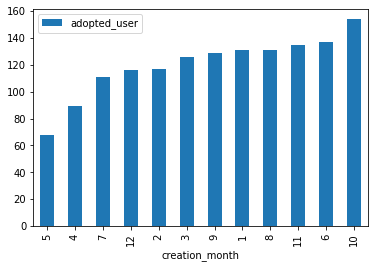

In [64]:
x = pd.DataFrame(adopted_users.groupby('creation_month')['adopted_user'].sum())
x.sort_values(by = 'adopted_user', inplace=True)
x.plot(kind='bar')
plt.show()

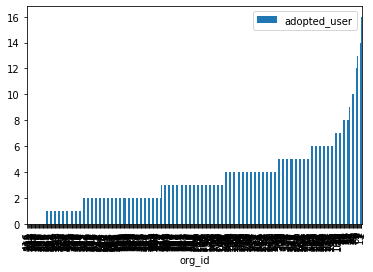

In [65]:
x = pd.DataFrame(adopted_users.groupby('org_id')['adopted_user'].sum())
x.sort_values(by = 'adopted_user', inplace=True)
x.plot(kind='bar')
plt.show()

Conclusion:
- User adoption is clearly dependent on organization.
- User creation month also seen as an important factor.
- User adoption of users joined in April and May seem to be considerably less.